Este proyecto se realiza en equipos.

Objetivo general del proyecto
Aplicar diversas variantes del algoritmo de regresión en la solución de un problema de aprendizaje automático.

Problema a solucionar
Estimar la puntuación de calidad de un vino.

Base de datos (véase archivo anexo)
https://archive.ics.uci.edu/ml/datasets/wine+quality

Actividades a desarrollar

Investigar acerca de las siguientes variantes del algoritmo: (a) Stochastic Gradient Descent y (b) Mini-batch Gradient Descent. ¿Cuáles son las diferencias y las ventajas/desventajas entre estas variantes? ¿cuáles son las condiciones bajo las cuales se prefieren aplicar estas variantes?. 

Investigar acerca de los procesos de normalización y estandarización de los parámetros de entrada (features).

Implementar en Python algoritmos "Multivariate Linear Regression" para la solución del problema, en sus variantes: (a) Ecuación Normal, (b) Batch Gradient Descent, (c) Stochastic Gradient Descent y (d) Mini-batch Gradient Descent; comparar las soluciones obtenidas.

Investigar acerca del algoritmo "Polynomial Regression". ¿Cuándo se aplica?, ¿qué problemas puede presentar una solución basada en este algoritmo?

Implementar en Python el algoritmo de "Polynomial Regression" para la solución de: (a) un conjunto (nube) de datos generados artificialmente (véase ejemplo de clase), y (b) el problema de la calidad del vino. Para el inciso (b) se recomienda revisar el tema "Turning a linear regression model into a curve – polynomial regression", del libro "Python Machine Learning".

Conclusiones generales a nivel de equipo; comentarios individuales (véase rúbrica).

Elaborar el "Reporte 1" especificado en la presentación del primer día de clases. Debe documentarse la información de los incisos 1-6.

Elaborar una video-entrega (todos los integrantes del equipo deberán participar). Como parte de la evaluación se consideran el dominio, la comprensión y la profundidad plasmadas en las explicaciones. Debe presentarse la información de los incisos 1-6.

Revisar en la presentación del primer día de clases
Los requisitos para la "Entrega en plataforma digital".
Los criterios de evaluación de (a) la "Entrega virtual" y (b) el "Reporte digital".


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Cargamos los datos

In [33]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


## A razon de lo aprendido cuando interactuamos con la libreria seaborn, se aprovecho realizar un HeatMap

<AxesSubplot:>

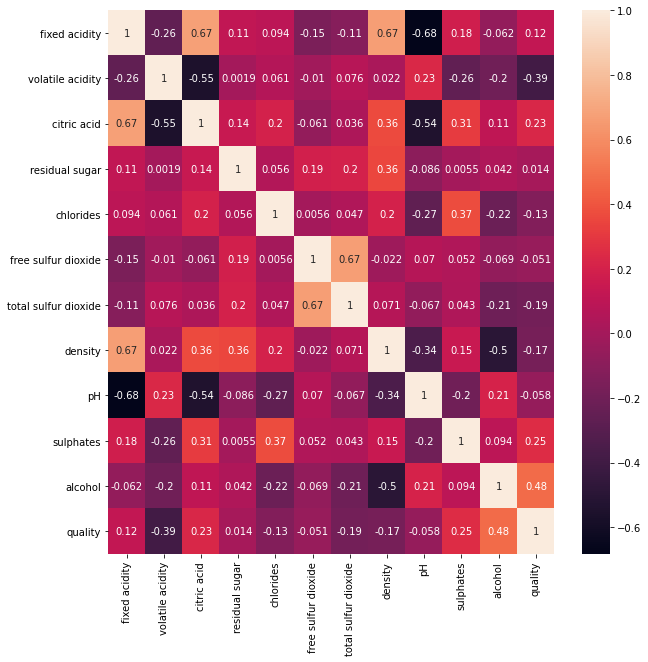

In [34]:
fig, ax = plt.subplots(figsize=(10,10))   
sb.heatmap(data.corr(), annot=True, ax= ax)

# Reconstruccion de los datos

In [35]:
x = data.loc[:, data.columns != 'quality'].to_numpy()
y = data.loc[:, data.columns == 'quality'].to_numpy().tolist()
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [36]:
y = np.array(y)
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]])

# Division de los datos

In [37]:
x_train = []
y_train = []

x_test = []
y_test = []

for i in range(len(data)):
    if i <= int(len(data) * 0.8) : 
        x_train.append(x[i])
        y_train.append(y[i])
    elif  i > int(len(data) * 0.8) :
        y_test.append(y[i])
        x_test.append(x[i])


x_train = np.array(x_train)
y_train = np.array(y_train)
y_test  = np.array(y_test)
x_test = np.array(x_test)


In [38]:
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)

x_train.shape[0]

1280

In [39]:
x_test.shape[0]

319

In [40]:
y_test.shape[0]

319

In [41]:
x_train

array([[ 1.   ,  7.4  ,  0.7  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 1.   ,  7.8  ,  0.88 , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 1.   ,  7.8  ,  0.76 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 1.   ,  7.   ,  0.69 , ...,  3.35 ,  0.6  ,  9.7  ],
       [ 1.   ,  8.   ,  0.715, ...,  3.24 ,  0.54 ,  9.5  ],
       [ 1.   ,  9.8  ,  0.3  , ...,  3.14 ,  0.57 , 11.5  ]])

In [42]:
y_train = y_train.reshape(y_train.shape[0],)

y_train[:10]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5])

Siguiendo los metodos tradicionales en las pruebas de datos por aprendizaje automático, nos aseguramos de crear datos para entrenar, y datos para probar, con eso podemos probar nuestra hipótesis con datos desconocidos, y con ello nuestros resultados no se veran comprometidos.

# Funciones establecidad

## Debido a que necesitamos alguna manera de probar nuestros datos, se creo, una funcion donde se realiza la prediccion por cada valor de y. Ademas se creo otra funcion que obtiene el RMSE, para observar la eficiencia de nuestra hipotesis entrenada

In [43]:
def prediction_raw(theta, x_test):
    test = np.zeros(x_test.shape[0])
    for num_index in range(len(x_test)):
        test[num_index] = theta[0] + theta[1]*x_test[num_index][0] + theta[2]*x_test[num_index][1]+theta[3]*x_test[num_index][2]+theta[4]*x_test[num_index][3]+theta[5]*x_test[num_index][4]+theta[6]*x_test[num_index][5]+theta[7]*x_test[num_index][6]+theta[8]*x_test[num_index][7]+theta[9]*x_test[num_index][8]+theta[10]*x_test[num_index][9]+theta[11]*x_test[num_index][10]

    return test

In [44]:
 def Root_Mean_Squared_Error(y_test, predictions):
    mean_squared_error = 0
    n = len(y_test)
    for i in range(len(y_test)):
        mean_squared_error =  (np.square((y_test[i] - predictions[i])) + mean_squared_error)
    root_squared_error = np.sqrt(mean_squared_error/n)
    return root_squared_error

# Ecuacion normal

In [45]:
theta_normal = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)) , np.dot(x_train.T , y_train))

theta_normal

array([ 2.39623534e+01,  2.34373991e-02, -1.05476525e+00, -1.82566021e-01,
        1.06088101e-02, -1.75789481e+00,  3.29573085e-03, -3.69081769e-03,
       -2.00563050e+01, -3.43404795e-01,  8.05230414e-01,  2.83323822e-01])

In [46]:
prediction_normal = prediction_raw(theta_normal, x_test)
Root_Mean_Squared_Error(y_test, prediction_normal)

array([0.65720643])

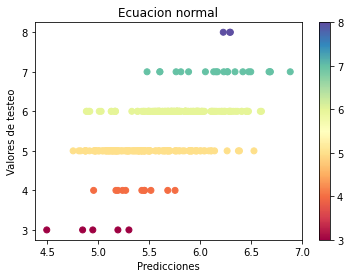

In [47]:
plt.scatter(prediction_normal, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Ecuacion normal')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Batch Gradient descent

In [59]:
number_of_features = x_train.shape[1]

theta_batch = np.random.rand(number_of_features)/100
print(theta_batch)

eta = 0.0001
n_iter = 20000
m = x_train.shape[0]

flag = True

j_batch = []
i = 0

delta = 0.03
meta = Root_Mean_Squared_Error(y_test, prediction_normal) +delta

paro = 0

corte = 5000
last_paro = 0
seg_corte = 0
seg_meta = 0

while flag:
    theta_batch = theta_batch - eta*(1/m * (x_train.T.dot((np.dot(x_train, theta_batch))  - y_train)))
    j_batch.append((1/(2*m))* np.square((np.dot(x_train, theta_batch)  - y_train)).sum())
    i = i +1
   
    prediction_batch_des = prediction_raw(theta_batch, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_batch_des)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) y J(i +1) es {}".format(abs(last_paro - paro)))
        corte = corte + 5000
        print()

    if  paro  <  meta:
        flag = False
        seg_corte = abs(last_paro - paro)
    elif abs(last_paro - paro) < 0.0000000001:
        flag = False
        seg_corte = abs(last_paro - paro)
    last_paro = paro
    seg_meta = seg_corte   
print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) y J(i +1) es {}".format(seg_corte))
print("Los valores de theta fueron: ")
print(theta_batch)



[0.00201877 0.00722995 0.00286758 0.00283908 0.0069454  0.00216742
 0.00221827 0.00406492 0.00611255 0.00750637 0.00748261 0.00734607]
El valor 5000 es un punto de corte
El valor 0.7169734668466092 representa al RMSE actual se quiere llegar a 0.687206430589033
La diferencia entre J(i) y J(i +1) es 1.1365593599599322e-06

El valor 10000 es un punto de corte
El valor 0.71845295499197 representa al RMSE actual se quiere llegar a 0.687206430589033
La diferencia entre J(i) y J(i +1) es 6.482641459193417e-07

El valor 15000 es un punto de corte
El valor 0.7205922157423807 representa al RMSE actual se quiere llegar a 0.687206430589033
La diferencia entre J(i) y J(i +1) es 2.0488701957255273e-07

Numero de iteraciones 18409
La meta se cumplio en 0.7209095236790394 se buscaba 0.687206430589033
La diferencia entre J(i) y J(i +1) es 7.905209820080472e-11
Los valores de theta fueron: 
[ 0.0466115   0.09150161 -0.02483628  0.01073245 -0.01207514  0.00412684
  0.00549121 -0.00267408  0.05023927  0.1

In [60]:
prediction_batch_des = prediction_raw(theta_batch, x_test)
prediction_batch_des[:10]

array([5.59017792, 5.59017792, 5.83691155, 5.52274993, 5.7745344 ,
       5.95839623, 6.41057387, 6.68029471, 5.29637222, 5.29637222])

In [61]:
y_test[:10]

array([[6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5]])

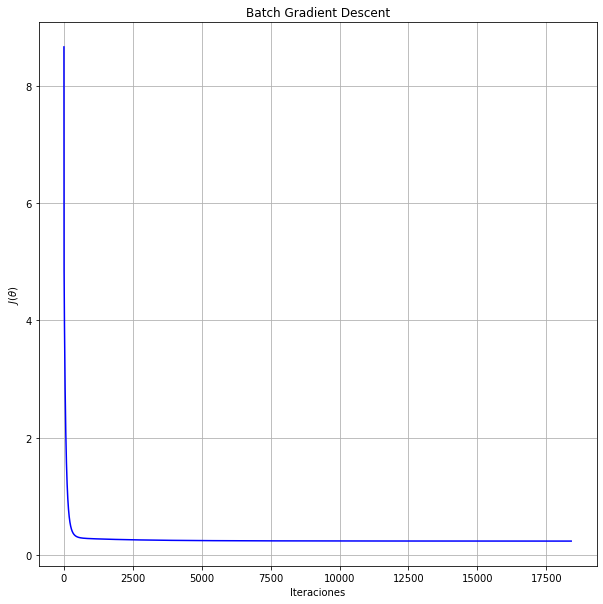

In [62]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_batch)),j_batch,"b-")
plt.title('Batch Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()


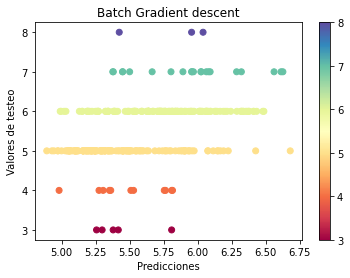

In [63]:
plt.scatter(prediction_batch_des, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Batch Gradient descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Stochastic Gradient Descent

In [48]:


number_of_features = x_train.shape[1]

theta_stoch =  np.random.rand(number_of_features)/100

print(theta_stoch)

eta = 0.01
n_iter = 15000
m = x_train.shape[0]
delta = 0.02
flag = True
j_stoch = []
i = 0
meta = Root_Mean_Squared_Error(y_test, prediction_normal) + delta

paro = 0
last_paro = 10
seg_meta = 0
corte = 5000
seg_corte = 0
while flag:
    random_indices = np.random.randint(0 ,m -1)
    x_stoch = x_train[random_indices]
    y_stoch = y_train[random_indices]

    theta_stoch = theta_stoch - eta*(1/m * x_stoch.T.dot(((np.dot(x_stoch, theta_stoch))  - y_stoch)))
    j_stoch.append((1/(2*m))* np.square((np.dot(x_train, theta_stoch)  - y_train)).sum())    
    i = i +1

    prediction_stoch_des = prediction_raw(theta_stoch, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_stoch_des)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) y J(i +1) es {}".format(abs(last_paro - paro)))
        corte = corte + 5000
        print()

    if paro < meta:
        flag = False
        seg_corte = abs(last_paro - paro)
    elif abs(last_paro - paro) < 0.00000001:
        flag = False
        seg_corte = abs(last_paro - paro)
    last_paro = paro
    seg_meta = seg_corte
print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) y J(i +1) es {}".format(seg_corte))
print("Los valores de theta fueron: ")
theta_stoch

[0.00494062 0.00666443 0.00559507 0.00647892 0.00254668 0.00278881
 0.00834808 0.00157445 0.00686607 0.00236847 0.00919016 0.00668113]
El valor 5000 es un punto de corte
El valor [0.82634012] representa al RMSE actual se quiere llegar a [0.67720643]
La diferencia entre J(i) y J(i +1) es [0.00059186]

Numero de iteraciones 5946
La meta se cumplio en [0.78473996] se buscaba [0.67720643]
La diferencia entre J(i) y J(i +1) es [7.73179309e-09]
Los valores de theta fueron: 


array([ 0.0300273 ,  0.21462458,  0.01713843,  0.01324118,  0.05169513,
        0.0048573 ,  0.03635935, -0.00471641,  0.03185422,  0.08580296,
        0.02601701,  0.27899382])

In [49]:
prediction_stoch_des[:10]

array([5.66542082, 5.66542082, 5.4421247 , 5.51810053, 5.52419604,
       6.31356463, 5.95655108, 5.91356707, 5.17914852, 5.17914852])

In [50]:
y_test[:10]

array([[6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5]])

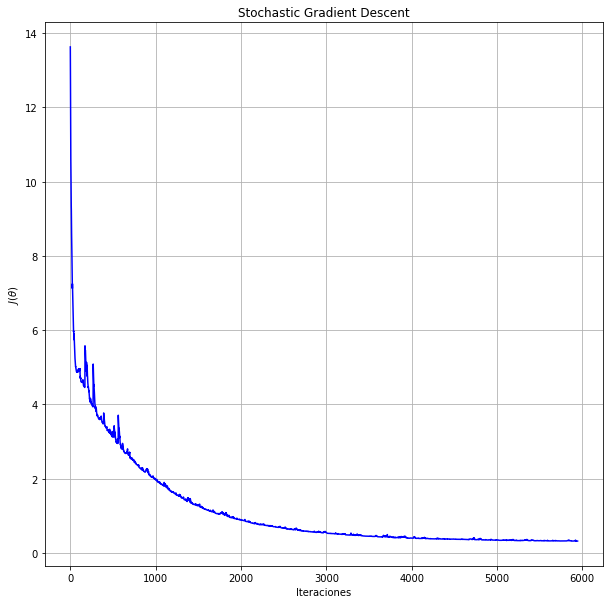

In [51]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_stoch)),j_stoch,"b-")
plt.title('Stochastic Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()

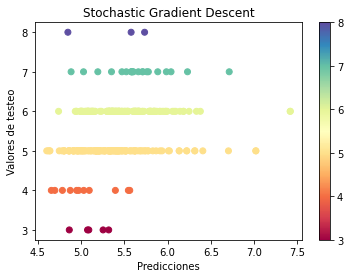

In [52]:
plt.scatter(prediction_stoch_des, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Stochastic Gradient Descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Mini-Batch Gradient Descent

In [73]:
number_of_features = x_train.shape[1]

theta_mini =np.random.rand(number_of_features)/100

print(theta_mini)

eta = 0.01
m = x_train.shape[0]
batch_size = 24


delta = - 0.02
flag = True
j_mini = []
i = 0
meta = Root_Mean_Squared_Error(y_test, prediction_normal) + delta

paro = 0
last_paro = 0
corte = 1000
seg_meta = 0
seg_corte = 0
while flag:
    random_indices = np.random.permutation(m)
    x_batch_size = x_train[random_indices]
    y_batch_size = y_train[random_indices]
    
    for j in range(0 , m , batch_size):
        x_mini = x_batch_size[j:j + batch_size]
        y_mini = y_batch_size[j:j + batch_size]
        theta_mini =  theta_mini  - (eta/m) * (x_mini.T.dot(((np.dot(theta_mini, x_mini.T)) - y_mini)))  
    j_mini.append((1/(2*m))* np.sum(np.square((np.dot(x_train, theta_mini)  - y_train))))  
    i = i +1  
    
    prediction_mini = prediction_raw(theta_mini, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_mini)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) y J(i +1) es {}".format(abs(last_paro - paro)))
        corte = corte + 1000
        print()

    if paro  <  meta:
        seg_corte = abs(last_paro - paro)
        flag = False
    elif abs(last_paro - paro) < 0.000001:
        seg_corte = abs(last_paro - paro)
        flag = False
    last_paro = paro
    seg_meta = seg_corte
print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) y J(i +1) es {}".format(seg_corte))
print("Los valores de theta fueron: ")
theta_mini

[0.00898238 0.00249122 0.00418005 0.00221219 0.00891162 0.00625984
 0.00869789 0.00572332 0.00236928 0.00328414 0.00082786 0.00552833]
El valor 1000 es un punto de corte
El valor [0.71042448] representa al RMSE actual se quiere llegar a [0.63720643]
La diferencia entre J(i) y J(i +1) es [0.00124462]

El valor 2000 es un punto de corte
El valor [0.6934012] representa al RMSE actual se quiere llegar a [0.63720643]
La diferencia entre J(i) y J(i +1) es [0.04154133]

Numero de iteraciones 2778
La meta se cumplio en [0.68990239] se buscaba [0.63720643]
La diferencia entre J(i) y J(i +1) es [1.31228885e-07]
Los valores de theta fueron: 


array([ 0.17047218,  0.06413865, -0.50472359,  0.0846631 , -0.00863398,
       -0.01956662,  0.00492496, -0.00230301,  0.16146054,  0.34291746,
        0.43389993,  0.35612913])

In [74]:
prediction_mini[:10]

array([5.70406234, 5.70406234, 5.74542078, 5.51865068, 5.85593447,
       5.95167815, 6.53122428, 6.41735357, 5.58012132, 5.58012132])

In [75]:
y_test[:10]

array([[6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5]])

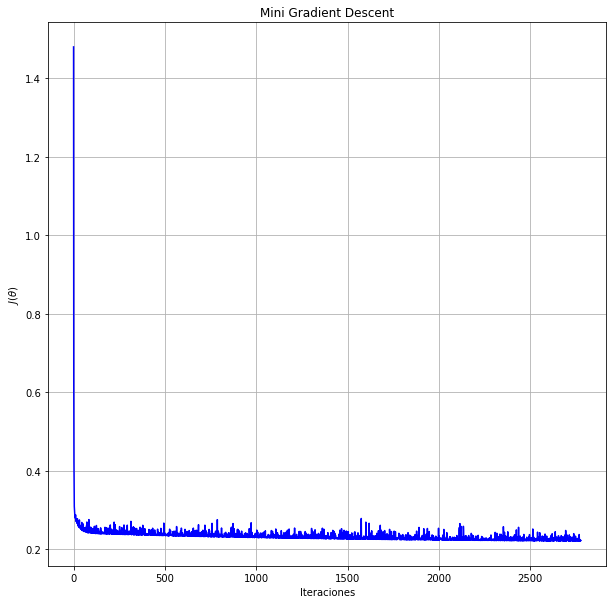

In [76]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_mini)),j_mini,"b-")
plt.title('Mini Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()

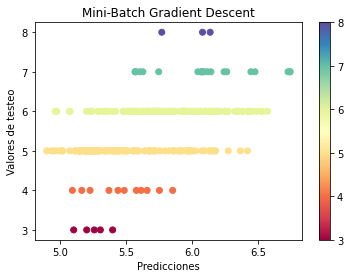

In [77]:
plt.scatter(prediction_mini, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Mini-Batch Gradient Descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()